# Logistic Regression
developer: Mohammad mehdi Sahraei
***
[maktabkhooneh](https://maktabkhooneh.org/course/%DB%8C%D8%A7%D8%AF%DA%AF%DB%8C%D8%B1%DB%8C-%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-mk1318/)



### Importing Needed packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [6]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

In [17]:
# df['oldpeak'].value_counts
print(df.shape)
df.dtypes

(303, 14)


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### histogram

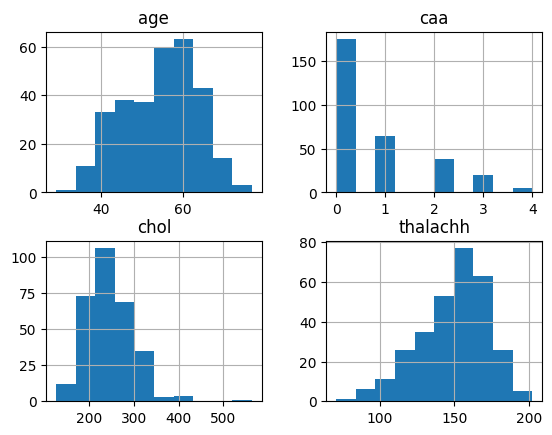

In [16]:
df_hist = df[['age','caa','chol','thalachh']]
df_hist.hist()
plt.show()

In [18]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [149]:
set_group = df.groupby(['oldpeak'])
set_group.get_group(3)[:3]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0


### converting the Pandas data frame to a Numpy array:

In [24]:
# df.columns
cdf = df[['age','sex','cp','trtbps','chol','thalachh','exng','oldpeak','caa','output']]

In [30]:
x = np.asarray(cdf[['age','sex','cp','trtbps','chol','thalachh','exng','oldpeak','caa']])
y = np.asarray(cdf['output'])

print(x[0:5],'\n')
print(y[100:])

[[ 63.    1.    3.  145.  233.  150.    0.    2.3   0. ]
 [ 37.    1.    2.  130.  250.  187.    0.    3.5   0. ]
 [ 41.    0.    1.  130.  204.  172.    0.    1.4   0. ]
 [ 56.    1.    1.  120.  236.  178.    0.    0.8   0. ]
 [ 57.    0.    0.  120.  354.  163.    1.    0.6   0. ]] 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Normalizing Data
- we should do Normalizing

In [31]:
from sklearn import preprocessing

fitting = preprocessing.StandardScaler().fit(x)
x = fitting.transform(x)
x[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         0.01544279, -0.69663055,  1.08733806, -0.71442887],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
         1.63347147, -0.69663055,  2.12257273, -0.71442887],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
         0.97751389, -0.69663055,  0.31091206, -0.71442887],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
         1.23989692, -0.69663055, -0.20670527, -0.71442887],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
         0.58393935,  1.43548113, -0.37924438, -0.71442887]])

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 9) (242,)
Test set: (61, 9) (61,)


## Training Model
- [LogisticRegression link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- C: Regularization is a technique used to solve the overfitting problem of machine learning models. Smaller values specify stronger regularization
- solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’



In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='lbfgs').fit(x_train,y_train)
LR

LogisticRegression(C=0.01)

### Predicting


In [135]:
yhat = LR.predict(x_test)

In [136]:
print(yhat[0:20])
print(y_test[0:20])

[1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


In [137]:
# the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob = LR.predict_proba(x_test)
yhat_prob[0:20]

array([[0.34, 0.66],
       [0.62, 0.38],
       [0.45, 0.55],
       [0.16, 0.84],
       [0.31, 0.69],
       [0.44, 0.56],
       [0.64, 0.36],
       [0.26, 0.74],
       [0.45, 0.55],
       [0.34, 0.66],
       [0.31, 0.69],
       [0.22, 0.78],
       [0.34, 0.66],
       [0.55, 0.45],
       [0.37, 0.63],
       [0.77, 0.23],
       [0.3 , 0.7 ],
       [0.33, 0.67],
       [0.7 , 0.3 ],
       [0.36, 0.64]])

<h2 id="evaluation">Evaluation</h2>


- jaccard 

In [138]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat, pos_label = 0) # 1 or 0 - binary

0.7307692307692307

- confusion matrix

In [139]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False, # because we had done normalizing at previous cells
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[35  1]
 [ 6 19]]


Confusion matrix, without normalization
[[35  1]
 [ 6 19]]


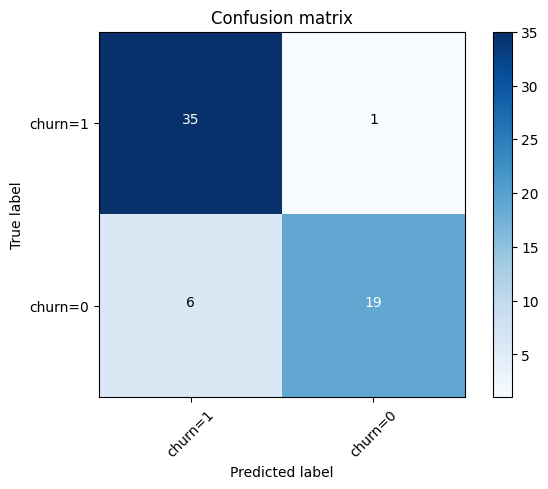

In [140]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

- **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)


In [142]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



- log loss


In [148]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.45111539845224746